Convolutional Dictionary Learning
=================================

This example demonstrates the use of [fista.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.fista.cbpdndl.html#sporco.fista.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of colour training images [[30]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional), using FISTA solvers for both sparse coding [[8]](http://sporco.rtfd.org/en/latest/zreferences.html#chalasani-2013-fast) [[32]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-efficient) and dictionary update steps [[15]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np


from sporco.fista import cbpdndl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.5)
img1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
img2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
img3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S = np.stack((img1, img2, img3), axis=3)

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(16, 16, 3, 96)

Set regularization parameter and options for dictionary learning solver. Note the multi-scale dictionary filter sizes.

In [5]:
lmbda = 0.2
L_sc = 360.0
L_du = 50.0
dsz = ((8, 8, 3, 32), (12, 12, 3, 32), (16, 16, 3, 32))
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True,
                'MaxMainIter': 200, 'DictSize': dsz,
                'CBPDN': {'BackTrack': {'Enabled': True }, 'L': L_sc},
                'CCMOD': {'BackTrack': {'Enabled': True }, 'L': L_du } })

Create solver object and solve.

In [6]:
d = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt)
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

L xstep in cbpdndl:  1800.0
L dstep in cbpdndl:  50.0
Itn   Fnc       DFid      ℓ1        Cnstr     F_X       Q_X       It_X      L_X       F_D       Q_D       It_D      L_D       
----------------------------------------------------------------------------------------------------------------------------


   0  1.91e+03  1.90e+03  3.23e+01  1.95e-06  0.00e+00  0.00e+00  0.00e+00  1.80e+03  0.00e+00  0.00e+00  0.00e+00  5.00e+01


   1  1.90e+03  1.89e+03  6.60e+01  1.76e-06  6.25e+07  6.30e+07  1.00e+00  1.80e+03  6.25e+07  6.25e+07  1.00e+00  5.00e+01


   2  1.89e+03  1.87e+03  1.12e+02  1.94e-06  6.19e+07  6.25e+07  1.00e+00  1.80e+03  6.18e+07  6.20e+07  1.00e+00  5.00e+01


   3  1.88e+03  1.84e+03  1.76e+02  1.93e-06  6.10e+07  6.17e+07  1.00e+00  1.80e+03  6.08e+07  6.11e+07  1.00e+00  5.00e+01


   4  1.85e+03  1.80e+03  2.67e+02  2.26e-06  5.96e+07  6.05e+07  1.00e+00  1.80e+03  5.90e+07  5.96e+07  1.00e+00  5.00e+01


   5  1.80e+03  1.72e+03  4.04e+02  2.19e-06  5.71e+07  5.85e+07  1.00e+00  1.80e+03  5.60e+07  5.69e+07  1.00e+00  5.00e+01


   6  1.72e+03  1.60e+03  6.06e+02  1.97e-06  5.29e+07  5.50e+07  1.00e+00  1.80e+03  5.12e+07  5.23e+07  1.00e+00  5.00e+01


   7  1.59e+03  1.42e+03  8.79e+02  2.23e-06  4.69e+07  4.95e+07  1.00e+00  1.80e+03  4.52e+07  4.59e+07  1.00e+00  5.00e+01


   8  1.47e+03  1.23e+03  1.19e+03  2.36e-06  4.07e+07  4.27e+07  1.00e+00  1.80e+03  3.95e+07  3.97e+07  1.00e+00  5.00e+01


   9  1.38e+03  1.08e+03  1.49e+03  2.46e-06  3.57e+07  3.69e+07  1.00e+00  1.80e+03  3.49e+07  3.51e+07  1.00e+00  5.00e+01


  10  1.32e+03  9.69e+02  1.74e+03  2.01e-06  3.21e+07  3.28e+07  1.00e+00  1.80e+03  3.15e+07  3.16e+07  1.00e+00  5.00e+01


  11  1.27e+03  8.86e+02  1.93e+03  2.25e-06  2.93e+07  2.98e+07  1.00e+00  1.80e+03  2.89e+07  2.90e+07  1.00e+00  5.00e+01


  12  1.24e+03  8.22e+02  2.07e+03  2.01e-06  2.72e+07  2.75e+07  1.00e+00  1.80e+03  2.69e+07  2.69e+07  1.00e+00  5.00e+01


  13  1.21e+03  7.72e+02  2.18e+03  2.01e-06  2.55e+07  2.58e+07  1.00e+00  1.80e+03  2.53e+07  2.54e+07  1.00e+00  5.00e+01


  14  1.18e+03  7.31e+02  2.27e+03  2.09e-06  2.42e+07  2.44e+07  1.00e+00  1.80e+03  2.40e+07  2.41e+07  1.00e+00  5.00e+01


  15  1.16e+03  6.95e+02  2.33e+03  1.97e-06  2.30e+07  2.32e+07  1.00e+00  1.80e+03  2.29e+07  2.29e+07  1.00e+00  5.00e+01


  16  1.14e+03  6.64e+02  2.39e+03  2.19e-06  2.19e+07  2.21e+07  1.00e+00  1.80e+03  2.19e+07  2.19e+07  1.00e+00  5.00e+01


  17  1.12e+03  6.35e+02  2.44e+03  1.97e-06  2.10e+07  2.12e+07  1.00e+00  1.80e+03  2.09e+07  2.09e+07  1.00e+00  5.00e+01


  18  1.10e+03  6.08e+02  2.48e+03  2.11e-06  2.01e+07  2.03e+07  1.00e+00  1.80e+03  2.01e+07  2.01e+07  1.00e+00  5.00e+01


  19  1.09e+03  5.84e+02  2.52e+03  2.10e-06  1.93e+07  1.95e+07  1.00e+00  1.80e+03  1.93e+07  1.93e+07  1.00e+00  5.00e+01


  20  1.07e+03  5.62e+02  2.56e+03  2.19e-06  1.86e+07  1.87e+07  1.00e+00  1.80e+03  1.86e+07  1.86e+07  1.00e+00  5.00e+01


  21  1.06e+03  5.42e+02  2.59e+03  2.12e-06  1.79e+07  1.81e+07  1.00e+00  1.80e+03  1.79e+07  1.79e+07  1.00e+00  5.00e+01


  22  1.05e+03  5.24e+02  2.62e+03  1.78e-06  1.73e+07  1.75e+07  1.00e+00  1.80e+03  1.73e+07  1.73e+07  3.00e+01  9.89e+03


  23  1.04e+03  5.08e+02  2.65e+03  2.01e-06  1.68e+07  1.69e+07  1.00e+00  1.80e+03  1.68e+07  1.68e+07  3.00e+00  1.42e+04


  24  1.03e+03  4.94e+02  2.67e+03  1.90e-06  1.64e+07  1.64e+07  1.00e+00  1.80e+03  1.64e+07  1.64e+07  2.00e+00  1.71e+04


  25  1.02e+03  4.81e+02  2.69e+03  1.93e-06  1.59e+07  1.60e+07  1.00e+00  1.80e+03  1.59e+07  1.59e+07  2.00e+00  2.05e+04


  26  1.01e+03  4.70e+02  2.70e+03  1.84e-06  1.56e+07  1.56e+07  1.00e+00  1.80e+03  1.56e+07  1.56e+07  2.00e+00  2.46e+04


  27  1.00e+03  4.60e+02  2.71e+03  1.98e-06  1.52e+07  1.53e+07  1.00e+00  1.80e+03  1.52e+07  1.52e+07  3.00e+00  3.54e+04


  28  9.94e+02  4.50e+02  2.72e+03  1.85e-06  1.49e+07  1.50e+07  1.00e+00  1.80e+03  1.49e+07  1.49e+07  2.00e+00  4.25e+04


  29  9.87e+02  4.42e+02  2.73e+03  2.00e-06  1.46e+07  1.47e+07  1.00e+00  1.80e+03  1.46e+07  1.46e+07  2.00e+00  5.10e+04


  30  9.81e+02  4.34e+02  2.73e+03  1.97e-06  1.44e+07  1.44e+07  1.00e+00  1.80e+03  1.44e+07  1.44e+07  2.00e+00  6.12e+04


  31  9.74e+02  4.27e+02  2.74e+03  1.97e-06  1.41e+07  1.42e+07  1.00e+00  1.80e+03  1.42e+07  1.42e+07  2.00e+00  7.35e+04


  32  9.68e+02  4.20e+02  2.74e+03  1.78e-06  1.39e+07  1.40e+07  1.00e+00  1.80e+03  1.39e+07  1.39e+07  2.00e+00  8.82e+04


  33  9.62e+02  4.14e+02  2.74e+03  1.87e-06  1.37e+07  1.38e+07  1.00e+00  1.80e+03  1.37e+07  1.37e+07  2.00e+00  1.06e+05


  34  9.56e+02  4.09e+02  2.74e+03  1.67e-06  1.35e+07  1.36e+07  1.00e+00  1.80e+03  1.35e+07  1.35e+07  2.00e+00  1.27e+05


  35  9.51e+02  4.04e+02  2.74e+03  1.92e-06  1.34e+07  1.34e+07  1.00e+00  1.80e+03  1.34e+07  1.34e+07  1.00e+00  1.27e+05


  36  9.46e+02  3.99e+02  2.74e+03  1.67e-06  1.32e+07  1.32e+07  1.00e+00  1.80e+03  1.32e+07  1.32e+07  2.00e+00  1.52e+05


  37  9.41e+02  3.94e+02  2.73e+03  1.86e-06  1.31e+07  1.31e+07  1.00e+00  1.80e+03  1.31e+07  1.31e+07  2.00e+00  1.83e+05


  38  9.36e+02  3.90e+02  2.73e+03  2.09e-06  1.29e+07  1.30e+07  1.00e+00  1.80e+03  1.29e+07  1.29e+07  2.00e+00  2.19e+05


  39  9.32e+02  3.86e+02  2.73e+03  1.77e-06  1.28e+07  1.28e+07  1.00e+00  1.80e+03  1.28e+07  1.28e+07  2.00e+00  2.63e+05


  40  9.28e+02  3.83e+02  2.73e+03  1.94e-06  1.27e+07  1.27e+07  1.00e+00  1.80e+03  1.27e+07  1.27e+07  1.00e+00  2.63e+05


  41  9.24e+02  3.79e+02  2.72e+03  1.92e-06  1.25e+07  1.26e+07  1.00e+00  1.80e+03  1.26e+07  1.26e+07  2.00e+00  3.16e+05


  42  9.20e+02  3.76e+02  2.72e+03  1.79e-06  1.24e+07  1.25e+07  1.00e+00  1.80e+03  1.24e+07  1.24e+07  2.00e+00  3.79e+05


  43  9.16e+02  3.73e+02  2.71e+03  2.01e-06  1.23e+07  1.24e+07  1.00e+00  1.80e+03  1.23e+07  1.23e+07  2.00e+00  4.55e+05


  44  9.12e+02  3.70e+02  2.71e+03  1.85e-06  1.22e+07  1.23e+07  1.00e+00  1.80e+03  1.23e+07  1.23e+07  1.00e+00  4.55e+05


  45  9.09e+02  3.67e+02  2.71e+03  1.67e-06  1.22e+07  1.22e+07  1.00e+00  1.80e+03  1.22e+07  1.22e+07  2.00e+00  5.46e+05


  46  9.05e+02  3.65e+02  2.70e+03  1.62e-06  1.21e+07  1.21e+07  1.00e+00  1.80e+03  1.21e+07  1.21e+07  2.00e+00  6.55e+05


  47  9.02e+02  3.62e+02  2.70e+03  2.05e-06  1.20e+07  1.20e+07  1.00e+00  1.80e+03  1.20e+07  1.20e+07  1.00e+00  6.55e+05


  48  8.99e+02  3.60e+02  2.70e+03  1.87e-06  1.19e+07  1.19e+07  1.00e+00  1.80e+03  1.19e+07  1.19e+07  2.00e+00  7.86e+05


  49  8.96e+02  3.58e+02  2.69e+03  1.73e-06  1.18e+07  1.19e+07  1.00e+00  1.80e+03  1.18e+07  1.18e+07  1.00e+00  7.86e+05


  50  8.93e+02  3.56e+02  2.69e+03  1.68e-06  1.18e+07  1.18e+07  1.00e+00  1.80e+03  1.18e+07  1.18e+07  2.00e+00  9.44e+05


  51  8.91e+02  3.54e+02  2.69e+03  1.53e-06  1.17e+07  1.17e+07  1.00e+00  1.80e+03  1.17e+07  1.17e+07  2.00e+00  1.13e+06


  52  8.88e+02  3.52e+02  2.68e+03  1.65e-06  1.16e+07  1.17e+07  1.00e+00  1.80e+03  1.16e+07  1.16e+07  1.00e+00  1.13e+06


  53  8.85e+02  3.50e+02  2.68e+03  1.57e-06  1.16e+07  1.16e+07  1.00e+00  1.80e+03  1.16e+07  1.16e+07  2.00e+00  1.36e+06


  54  8.83e+02  3.48e+02  2.68e+03  1.53e-06  1.15e+07  1.15e+07  1.00e+00  1.80e+03  1.15e+07  1.15e+07  2.00e+00  1.63e+06


  55  8.81e+02  3.46e+02  2.67e+03  1.58e-06  1.15e+07  1.15e+07  1.00e+00  1.80e+03  1.15e+07  1.15e+07  1.00e+00  1.63e+06


  56  8.78e+02  3.45e+02  2.67e+03  1.77e-06  1.14e+07  1.14e+07  1.00e+00  1.80e+03  1.14e+07  1.14e+07  1.00e+00  1.63e+06


  57  8.76e+02  3.43e+02  2.67e+03  1.61e-06  1.13e+07  1.14e+07  1.00e+00  1.80e+03  1.13e+07  1.13e+07  2.00e+00  1.96e+06


  58  8.74e+02  3.41e+02  2.66e+03  1.50e-06  1.13e+07  1.13e+07  1.00e+00  1.80e+03  1.13e+07  1.13e+07  1.00e+00  1.96e+06


  59  8.72e+02  3.40e+02  2.66e+03  1.46e-06  1.12e+07  1.13e+07  1.00e+00  1.80e+03  1.12e+07  1.12e+07  2.00e+00  2.35e+06


  60  8.70e+02  3.39e+02  2.66e+03  1.61e-06  1.12e+07  1.12e+07  1.00e+00  1.80e+03  1.12e+07  1.12e+07  1.00e+00  2.35e+06


  61  8.68e+02  3.37e+02  2.65e+03  1.62e-06  1.12e+07  1.12e+07  1.00e+00  1.80e+03  1.12e+07  1.12e+07  2.00e+00  2.82e+06


  62  8.66e+02  3.36e+02  2.65e+03  1.60e-06  1.11e+07  1.11e+07  1.00e+00  1.80e+03  1.11e+07  1.11e+07  1.00e+00  2.82e+06


  63  8.64e+02  3.35e+02  2.65e+03  1.44e-06  1.11e+07  1.11e+07  1.00e+00  1.80e+03  1.11e+07  1.11e+07  2.00e+00  3.38e+06


  64  8.63e+02  3.33e+02  2.65e+03  1.58e-06  1.10e+07  1.10e+07  1.00e+00  1.80e+03  1.10e+07  1.10e+07  1.00e+00  3.38e+06


  65  8.61e+02  3.32e+02  2.64e+03  1.69e-06  1.10e+07  1.10e+07  1.00e+00  1.80e+03  1.10e+07  1.10e+07  1.00e+00  3.38e+06


  66  8.59e+02  3.31e+02  2.64e+03  1.36e-06  1.09e+07  1.10e+07  1.00e+00  1.80e+03  1.10e+07  1.10e+07  2.00e+00  4.06e+06


  67  8.58e+02  3.30e+02  2.64e+03  1.31e-06  1.09e+07  1.09e+07  1.00e+00  1.80e+03  1.09e+07  1.09e+07  1.00e+00  4.06e+06


  68  8.56e+02  3.29e+02  2.64e+03  1.22e-06  1.09e+07  1.09e+07  1.00e+00  1.80e+03  1.09e+07  1.09e+07  1.00e+00  4.06e+06


  69  8.55e+02  3.28e+02  2.63e+03  1.43e-06  1.08e+07  1.09e+07  1.00e+00  1.80e+03  1.08e+07  1.08e+07  2.00e+00  4.87e+06


  70  8.53e+02  3.27e+02  2.63e+03  1.46e-06  1.08e+07  1.08e+07  1.00e+00  1.80e+03  1.08e+07  1.08e+07  2.00e+00  5.84e+06


  71  8.52e+02  3.26e+02  2.63e+03  1.33e-06  1.08e+07  1.08e+07  1.00e+00  1.80e+03  1.08e+07  1.08e+07  1.00e+00  5.84e+06


  72  8.50e+02  3.25e+02  2.63e+03  1.44e-06  1.07e+07  1.08e+07  1.00e+00  1.80e+03  1.07e+07  1.07e+07  1.00e+00  5.84e+06


  73  8.49e+02  3.24e+02  2.63e+03  1.47e-06  1.07e+07  1.07e+07  1.00e+00  1.80e+03  1.07e+07  1.07e+07  1.00e+00  5.84e+06


  74  8.48e+02  3.23e+02  2.62e+03  1.22e-06  1.07e+07  1.07e+07  1.00e+00  1.80e+03  1.07e+07  1.07e+07  2.00e+00  7.01e+06


  75  8.46e+02  3.22e+02  2.62e+03  1.41e-06  1.07e+07  1.07e+07  1.00e+00  1.80e+03  1.07e+07  1.07e+07  1.00e+00  7.01e+06


  76  8.45e+02  3.21e+02  2.62e+03  1.31e-06  1.06e+07  1.06e+07  1.00e+00  1.80e+03  1.06e+07  1.06e+07  1.00e+00  7.01e+06


  77  8.44e+02  3.20e+02  2.62e+03  1.31e-06  1.06e+07  1.06e+07  1.00e+00  1.80e+03  1.06e+07  1.06e+07  1.00e+00  7.01e+06


  78  8.43e+02  3.20e+02  2.62e+03  1.32e-06  1.06e+07  1.06e+07  1.00e+00  1.80e+03  1.06e+07  1.06e+07  2.00e+00  8.41e+06


  79  8.42e+02  3.19e+02  2.61e+03  9.82e-07  1.06e+07  1.06e+07  1.00e+00  1.80e+03  1.06e+07  1.06e+07  1.00e+00  8.41e+06


  80  8.40e+02  3.18e+02  2.61e+03  1.18e-06  1.05e+07  1.05e+07  1.00e+00  1.80e+03  1.05e+07  1.05e+07  2.00e+00  1.01e+07


  81  8.39e+02  3.17e+02  2.61e+03  1.26e-06  1.05e+07  1.05e+07  1.00e+00  1.80e+03  1.05e+07  1.05e+07  1.00e+00  1.01e+07


  82  8.38e+02  3.17e+02  2.61e+03  1.28e-06  1.05e+07  1.05e+07  1.00e+00  1.80e+03  1.05e+07  1.05e+07  1.00e+00  1.01e+07


  83  8.37e+02  3.16e+02  2.61e+03  9.49e-07  1.05e+07  1.05e+07  1.00e+00  1.80e+03  1.05e+07  1.05e+07  1.00e+00  1.01e+07


  84  8.36e+02  3.15e+02  2.60e+03  1.06e-06  1.04e+07  1.04e+07  1.00e+00  1.80e+03  1.04e+07  1.04e+07  1.00e+00  1.01e+07


  85  8.35e+02  3.15e+02  2.60e+03  1.09e-06  1.04e+07  1.04e+07  1.00e+00  1.80e+03  1.04e+07  1.04e+07  1.00e+00  1.01e+07


  86  8.34e+02  3.14e+02  2.60e+03  1.19e-06  1.04e+07  1.04e+07  1.00e+00  1.80e+03  1.04e+07  1.04e+07  1.00e+00  1.01e+07


  87  8.33e+02  3.14e+02  2.60e+03  1.10e-06  1.04e+07  1.04e+07  1.00e+00  1.80e+03  1.04e+07  1.04e+07  1.00e+00  1.01e+07


  88  8.32e+02  3.13e+02  2.60e+03  1.07e-06  1.04e+07  1.04e+07  1.00e+00  1.80e+03  1.04e+07  1.04e+07  1.00e+00  1.01e+07


  89  8.32e+02  3.12e+02  2.60e+03  1.12e-06  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  90  8.31e+02  3.12e+02  2.59e+03  1.06e-06  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  91  8.30e+02  3.11e+02  2.59e+03  1.04e-06  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  92  8.29e+02  3.11e+02  2.59e+03  1.23e-06  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  93  8.28e+02  3.10e+02  2.59e+03  9.38e-07  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  94  8.27e+02  3.10e+02  2.59e+03  1.04e-06  1.03e+07  1.03e+07  1.00e+00  1.80e+03  1.03e+07  1.03e+07  1.00e+00  1.01e+07


  95  8.27e+02  3.09e+02  2.59e+03  9.07e-07  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


  96  8.26e+02  3.09e+02  2.59e+03  1.09e-06  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


  97  8.25e+02  3.08e+02  2.58e+03  8.98e-07  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


  98  8.25e+02  3.08e+02  2.58e+03  8.90e-07  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


  99  8.24e+02  3.08e+02  2.58e+03  1.02e-06  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


 100  8.23e+02  3.07e+02  2.58e+03  1.03e-06  1.02e+07  1.02e+07  1.00e+00  1.80e+03  1.02e+07  1.02e+07  1.00e+00  1.01e+07


 101  8.22e+02  3.07e+02  2.58e+03  1.04e-06  1.01e+07  1.02e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 102  8.22e+02  3.06e+02  2.58e+03  1.07e-06  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 103  8.21e+02  3.06e+02  2.58e+03  8.92e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 104  8.21e+02  3.06e+02  2.58e+03  9.59e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 105  8.20e+02  3.05e+02  2.57e+03  8.73e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 106  8.19e+02  3.05e+02  2.57e+03  8.93e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 107  8.19e+02  3.04e+02  2.57e+03  1.13e-06  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 108  8.18e+02  3.04e+02  2.57e+03  9.39e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 109  8.18e+02  3.04e+02  2.57e+03  8.68e-07  1.01e+07  1.01e+07  1.00e+00  1.80e+03  1.01e+07  1.01e+07  1.00e+00  1.01e+07


 110  8.17e+02  3.03e+02  2.57e+03  8.80e-07  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 111  8.17e+02  3.03e+02  2.57e+03  1.06e-06  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 112  8.16e+02  3.03e+02  2.57e+03  9.50e-07  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 113  8.16e+02  3.03e+02  2.56e+03  1.09e-06  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 114  8.15e+02  3.02e+02  2.56e+03  9.02e-07  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 115  8.15e+02  3.02e+02  2.56e+03  8.88e-07  1.00e+07  1.00e+07  1.00e+00  1.80e+03  1.00e+07  1.00e+07  1.00e+00  1.01e+07


 116  8.14e+02  3.02e+02  2.56e+03  8.55e-07  9.99e+06  9.99e+06  1.00e+00  1.80e+03  9.99e+06  9.99e+06  1.00e+00  1.01e+07


 117  8.14e+02  3.02e+02  2.56e+03  8.81e-07  9.98e+06  9.98e+06  1.00e+00  1.80e+03  9.98e+06  9.98e+06  1.00e+00  1.01e+07


 118  8.13e+02  3.01e+02  2.56e+03  1.07e-06  9.97e+06  9.98e+06  1.00e+00  1.80e+03  9.97e+06  9.97e+06  1.00e+00  1.01e+07


 119  8.13e+02  3.01e+02  2.56e+03  7.88e-07  9.96e+06  9.97e+06  1.00e+00  1.80e+03  9.96e+06  9.96e+06  1.00e+00  1.01e+07


 120  8.12e+02  3.01e+02  2.56e+03  9.77e-07  9.96e+06  9.96e+06  1.00e+00  1.80e+03  9.96e+06  9.96e+06  1.00e+00  1.01e+07


 121  8.12e+02  3.01e+02  2.56e+03  9.39e-07  9.95e+06  9.95e+06  1.00e+00  1.80e+03  9.95e+06  9.95e+06  1.00e+00  1.01e+07


 122  8.11e+02  3.00e+02  2.55e+03  1.01e-06  9.94e+06  9.95e+06  1.00e+00  1.80e+03  9.94e+06  9.94e+06  1.00e+00  1.01e+07


 123  8.11e+02  3.00e+02  2.55e+03  8.20e-07  9.94e+06  9.94e+06  1.00e+00  1.80e+03  9.94e+06  9.94e+06  1.00e+00  1.01e+07


 124  8.10e+02  3.00e+02  2.55e+03  9.54e-07  9.93e+06  9.93e+06  1.00e+00  1.80e+03  9.93e+06  9.93e+06  1.00e+00  1.01e+07


 125  8.10e+02  3.00e+02  2.55e+03  1.02e-06  9.92e+06  9.93e+06  1.00e+00  1.80e+03  9.92e+06  9.92e+06  1.00e+00  1.01e+07


 126  8.10e+02  3.00e+02  2.55e+03  9.64e-07  9.92e+06  9.92e+06  1.00e+00  1.80e+03  9.92e+06  9.92e+06  1.00e+00  1.01e+07


 127  8.09e+02  2.99e+02  2.55e+03  9.61e-07  9.91e+06  9.91e+06  1.00e+00  1.80e+03  9.91e+06  9.91e+06  1.00e+00  1.01e+07


 128  8.09e+02  2.99e+02  2.55e+03  9.29e-07  9.90e+06  9.91e+06  1.00e+00  1.80e+03  9.90e+06  9.90e+06  1.00e+00  1.01e+07


 129  8.08e+02  2.99e+02  2.55e+03  9.26e-07  9.90e+06  9.90e+06  1.00e+00  1.80e+03  9.90e+06  9.90e+06  1.00e+00  1.01e+07


 130  8.08e+02  2.99e+02  2.55e+03  9.97e-07  9.89e+06  9.90e+06  1.00e+00  1.80e+03  9.89e+06  9.89e+06  1.00e+00  1.01e+07


 131  8.08e+02  2.99e+02  2.54e+03  9.77e-07  9.89e+06  9.89e+06  1.00e+00  1.80e+03  9.89e+06  9.89e+06  1.00e+00  1.01e+07


 132  8.07e+02  2.99e+02  2.54e+03  1.04e-06  9.88e+06  9.88e+06  1.00e+00  1.80e+03  9.88e+06  9.88e+06  1.00e+00  1.01e+07


 133  8.07e+02  2.98e+02  2.54e+03  8.50e-07  9.88e+06  9.88e+06  1.00e+00  1.80e+03  9.88e+06  9.88e+06  1.00e+00  1.01e+07


 134  8.07e+02  2.98e+02  2.54e+03  8.72e-07  9.87e+06  9.87e+06  1.00e+00  1.80e+03  9.87e+06  9.87e+06  1.00e+00  1.01e+07


 135  8.06e+02  2.98e+02  2.54e+03  9.32e-07  9.87e+06  9.87e+06  1.00e+00  1.80e+03  9.87e+06  9.87e+06  1.00e+00  1.01e+07


 136  8.06e+02  2.98e+02  2.54e+03  9.69e-07  9.86e+06  9.86e+06  1.00e+00  1.80e+03  9.86e+06  9.86e+06  1.00e+00  1.01e+07


 137  8.06e+02  2.98e+02  2.54e+03  1.00e-06  9.86e+06  9.86e+06  1.00e+00  1.80e+03  9.86e+06  9.86e+06  1.00e+00  1.01e+07


 138  8.05e+02  2.98e+02  2.54e+03  1.06e-06  9.85e+06  9.85e+06  1.00e+00  1.80e+03  9.85e+06  9.85e+06  1.00e+00  1.01e+07


 139  8.05e+02  2.98e+02  2.54e+03  1.01e-06  9.85e+06  9.85e+06  1.00e+00  1.80e+03  9.85e+06  9.85e+06  1.00e+00  1.01e+07


 140  8.05e+02  2.97e+02  2.54e+03  9.55e-07  9.84e+06  9.84e+06  1.00e+00  1.80e+03  9.84e+06  9.84e+06  1.00e+00  1.01e+07


 141  8.04e+02  2.97e+02  2.54e+03  8.79e-07  9.84e+06  9.84e+06  1.00e+00  1.80e+03  9.84e+06  9.84e+06  1.00e+00  1.01e+07


 142  8.04e+02  2.97e+02  2.54e+03  8.85e-07  9.83e+06  9.83e+06  1.00e+00  1.80e+03  9.83e+06  9.83e+06  1.00e+00  1.01e+07


 143  8.04e+02  2.97e+02  2.53e+03  9.46e-07  9.83e+06  9.83e+06  1.00e+00  1.80e+03  9.83e+06  9.83e+06  1.00e+00  1.01e+07


 144  8.04e+02  2.97e+02  2.53e+03  1.07e-06  9.82e+06  9.83e+06  1.00e+00  1.80e+03  9.82e+06  9.82e+06  1.00e+00  1.01e+07


 145  8.03e+02  2.97e+02  2.53e+03  1.10e-06  9.82e+06  9.82e+06  1.00e+00  1.80e+03  9.82e+06  9.82e+06  1.00e+00  1.01e+07


 146  8.03e+02  2.97e+02  2.53e+03  9.90e-07  9.82e+06  9.82e+06  1.00e+00  1.80e+03  9.82e+06  9.82e+06  1.00e+00  1.01e+07


 147  8.03e+02  2.97e+02  2.53e+03  9.03e-07  9.81e+06  9.81e+06  1.00e+00  1.80e+03  9.81e+06  9.81e+06  1.00e+00  1.01e+07


 148  8.02e+02  2.96e+02  2.53e+03  8.34e-07  9.81e+06  9.81e+06  1.00e+00  1.80e+03  9.81e+06  9.81e+06  1.00e+00  1.01e+07


 149  8.02e+02  2.96e+02  2.53e+03  8.67e-07  9.81e+06  9.81e+06  1.00e+00  1.80e+03  9.81e+06  9.81e+06  1.00e+00  1.01e+07


 150  8.02e+02  2.96e+02  2.53e+03  8.57e-07  9.80e+06  9.80e+06  1.00e+00  1.80e+03  9.80e+06  9.80e+06  1.00e+00  1.01e+07


 151  8.02e+02  2.96e+02  2.53e+03  9.87e-07  9.80e+06  9.80e+06  1.00e+00  1.80e+03  9.80e+06  9.80e+06  1.00e+00  1.01e+07


 152  8.01e+02  2.96e+02  2.53e+03  8.58e-07  9.80e+06  9.80e+06  1.00e+00  1.80e+03  9.80e+06  9.80e+06  1.00e+00  1.01e+07


 153  8.01e+02  2.96e+02  2.53e+03  8.23e-07  9.79e+06  9.80e+06  1.00e+00  1.80e+03  9.79e+06  9.79e+06  1.00e+00  1.01e+07


 154  8.01e+02  2.96e+02  2.53e+03  9.66e-07  9.79e+06  9.79e+06  1.00e+00  1.80e+03  9.79e+06  9.79e+06  1.00e+00  1.01e+07


 155  8.01e+02  2.96e+02  2.52e+03  1.01e-06  9.79e+06  9.79e+06  1.00e+00  1.80e+03  9.79e+06  9.79e+06  1.00e+00  1.01e+07


 156  8.01e+02  2.96e+02  2.52e+03  8.24e-07  9.79e+06  9.79e+06  1.00e+00  1.80e+03  9.79e+06  9.79e+06  1.00e+00  1.01e+07


 157  8.00e+02  2.96e+02  2.52e+03  1.04e-06  9.78e+06  9.79e+06  1.00e+00  1.80e+03  9.78e+06  9.78e+06  1.00e+00  1.01e+07


 158  8.00e+02  2.96e+02  2.52e+03  1.11e-06  9.78e+06  9.78e+06  1.00e+00  1.80e+03  9.78e+06  9.78e+06  1.00e+00  1.01e+07


 159  8.00e+02  2.96e+02  2.52e+03  8.16e-07  9.78e+06  9.78e+06  1.00e+00  1.80e+03  9.78e+06  9.78e+06  1.00e+00  1.01e+07


 160  8.00e+02  2.95e+02  2.52e+03  7.63e-07  9.78e+06  9.78e+06  1.00e+00  1.80e+03  9.78e+06  9.78e+06  1.00e+00  1.01e+07


 161  7.99e+02  2.95e+02  2.52e+03  8.85e-07  9.77e+06  9.78e+06  1.00e+00  1.80e+03  9.77e+06  9.77e+06  1.00e+00  1.01e+07


 162  7.99e+02  2.95e+02  2.52e+03  9.07e-07  9.77e+06  9.77e+06  1.00e+00  1.80e+03  9.77e+06  9.77e+06  1.00e+00  1.01e+07


 163  7.99e+02  2.95e+02  2.52e+03  9.50e-07  9.77e+06  9.77e+06  1.00e+00  1.80e+03  9.77e+06  9.77e+06  1.00e+00  1.01e+07


 164  7.99e+02  2.95e+02  2.52e+03  8.94e-07  9.77e+06  9.77e+06  1.00e+00  1.80e+03  9.77e+06  9.77e+06  1.00e+00  1.01e+07


 165  7.99e+02  2.95e+02  2.52e+03  1.03e-06  9.77e+06  9.77e+06  1.00e+00  1.80e+03  9.77e+06  9.77e+06  1.00e+00  1.01e+07


 166  7.98e+02  2.95e+02  2.52e+03  1.02e-06  9.76e+06  9.77e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 167  7.98e+02  2.95e+02  2.52e+03  9.82e-07  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 168  7.98e+02  2.95e+02  2.52e+03  1.05e-06  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 169  7.98e+02  2.95e+02  2.51e+03  8.78e-07  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 170  7.98e+02  2.95e+02  2.51e+03  1.00e-06  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 171  7.97e+02  2.95e+02  2.51e+03  9.27e-07  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 172  7.97e+02  2.95e+02  2.51e+03  1.01e-06  9.76e+06  9.76e+06  1.00e+00  1.80e+03  9.76e+06  9.76e+06  1.00e+00  1.01e+07


 173  7.97e+02  2.95e+02  2.51e+03  9.25e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 174  7.97e+02  2.95e+02  2.51e+03  8.63e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 175  7.97e+02  2.95e+02  2.51e+03  9.87e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 176  7.97e+02  2.95e+02  2.51e+03  8.52e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 177  7.96e+02  2.95e+02  2.51e+03  9.56e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 178  7.96e+02  2.95e+02  2.51e+03  9.94e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 179  7.96e+02  2.94e+02  2.51e+03  8.72e-07  9.75e+06  9.75e+06  1.00e+00  1.80e+03  9.75e+06  9.75e+06  1.00e+00  1.01e+07


 180  7.96e+02  2.94e+02  2.51e+03  9.01e-07  9.74e+06  9.75e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 181  7.96e+02  2.94e+02  2.51e+03  8.77e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 182  7.96e+02  2.94e+02  2.51e+03  8.87e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 183  7.95e+02  2.94e+02  2.51e+03  9.89e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 184  7.95e+02  2.94e+02  2.50e+03  9.74e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 185  7.95e+02  2.94e+02  2.50e+03  9.78e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 186  7.95e+02  2.94e+02  2.50e+03  1.08e-06  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 187  7.95e+02  2.94e+02  2.50e+03  8.55e-07  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 188  7.95e+02  2.94e+02  2.50e+03  1.06e-06  9.74e+06  9.74e+06  1.00e+00  1.80e+03  9.74e+06  9.74e+06  1.00e+00  1.01e+07


 189  7.95e+02  2.94e+02  2.50e+03  7.52e-07  9.73e+06  9.74e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 190  7.94e+02  2.94e+02  2.50e+03  8.64e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 191  7.94e+02  2.94e+02  2.50e+03  9.40e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 192  7.94e+02  2.94e+02  2.50e+03  9.06e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 193  7.94e+02  2.94e+02  2.50e+03  8.91e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 194  7.94e+02  2.94e+02  2.50e+03  9.42e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 195  7.94e+02  2.94e+02  2.50e+03  9.83e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 196  7.94e+02  2.94e+02  2.50e+03  1.09e-06  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 197  7.94e+02  2.94e+02  2.50e+03  9.20e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 198  7.93e+02  2.94e+02  2.50e+03  7.95e-07  9.73e+06  9.73e+06  1.00e+00  1.80e+03  9.73e+06  9.73e+06  1.00e+00  1.01e+07


 199  7.93e+02  2.94e+02  2.50e+03  8.27e-07  9.72e+06  9.73e+06  1.00e+00  1.80e+03  9.72e+06  9.72e+06  1.00e+00  1.01e+07
----------------------------------------------------------------------------------------------------------------------------
ConvBPDNDictLearn solve time: 456.68s


Display initial and final dictionaries.

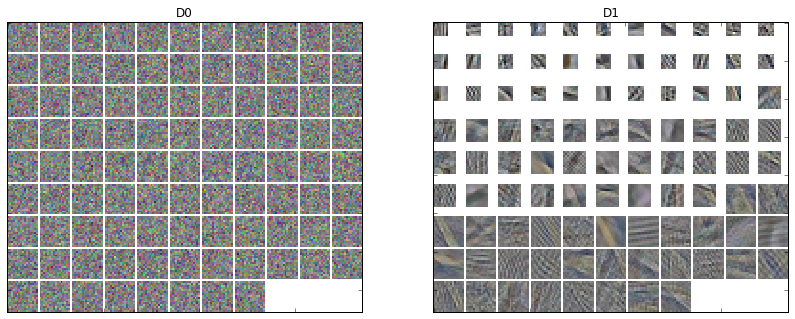

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), fgrf=fig, title='D0')
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1, dsz), fgrf=fig, title='D1')
fig.show()

Get iterations statistics from solver object and plot functional value, residuals, and automatically adjusted gradient step parameters against the iteration number.

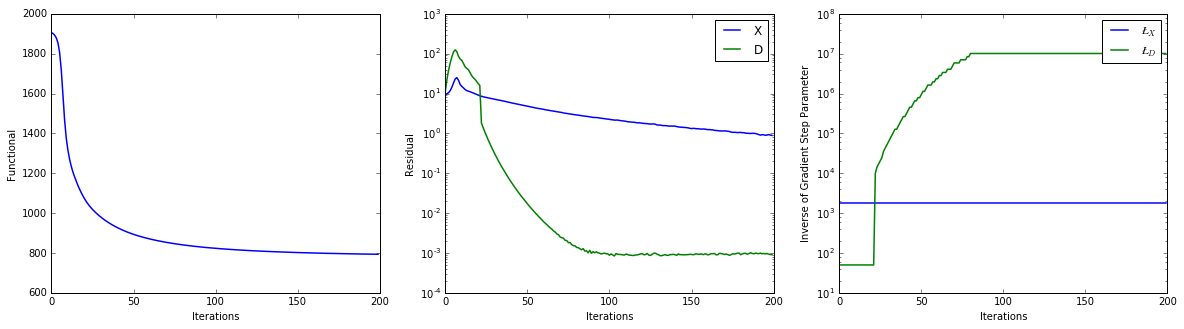

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fgrf=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.X_Rsdl, its.D_Rsdl)).T,
          fgrf=fig, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['X', 'D'])
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.X_L, its.D_L)).T, fgrf=fig, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', ptyp='semilogy',
          lgnd=['$\L_X$', '$\L_D$'])
fig.show()